In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container {width: 99% !important;}</style>"))

In [2]:
import pyspark

In [3]:
sc = pyspark.SparkContext()

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession(sc)

In [5]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [6]:
spark

# Where to Begin

## Where to Begin
1. Where to Begin

Hi, I'm John Hogue and welcome to Feature Engineering with PySpark. Easily one of the most important aspects of applied machine learning is feature engineering. It is the process of using domain knowledge to create new features to help our models perform better. In this course, we will look at a real data set and work our way to building a Regression Model in PySpark.

2. Diving Straight to Analysis

Before we dive in its important to note that while the techniques you'll learn in this course are invaluable, that data science cannot be applied as a cookie cutter. You will need to research your data and become your own expert. There is much to be said of the dangers of not understanding your data, especially where our outputs are increasingly being used to make decisions and inform policies. Before you dive into modeling, spend time to define what your goals are and how the output might be used. Take the time to research your data and its limitations. Often times you may be tasked with explaining what is and isn't possible. Lastly, remember that data science is all about being curious, asking questions and applying new ways to solve problems!

3. The Data Science Process

Every project and data set is different. Data Science is an iterative process that requires comfort with uncertainty as at any point you may have to go backward or even start over. A good project may inspire further questions that set the goals for the next project! As we progress through this process, this course will have extra emphasis on a lot of the 'art' sides of data science, exploring data, cleaning it and engineering it for use in a model.

4. Spark changes fast and frequently

Before we get started, as a cutting-edge technology, Spark changes fast and frequently. Make sure you are looking at the right version! You can always go to the latest URL by using slash latest or put the version number, major, minor and patch to get a specific version. Programmatically you can check your version of Spark with these commands. That way you can ensure you are looking at the right documentation and not using deprecated methods!

5. Data Formats: Parquet

For this course, we will be using a Parquet file. Like most data in Hadoop, the platform that Spark runs on, it is a write once, read many times format. Parquet data is columnar, meaning that it is organized by columns, an important feature for huge data sets as it is blazingly fast to read in ONLY the data you need. CSVs, on the other hand, have to read and parse the whole data set to read a single field. Another difference is Parquet fields are defined and typed, saving users from defining data types, like dates, booleans, or strings. For this reason, parquet is relatively slow to write. Since it's not delimited by characters it's less likely to be read in wrong if those characters exist in the data. These are just a few advantages that are causing the industry to adopt Parquet quickly.

6. Getting the Data to Spark

We have many format readers to choose from for converting various file types to a PySpark DataFrame. Here we will use spark read parquet and put the results into the variable df representing a dataframe.

7. Let's Practice!

In this video, we covered off on some important considerations when starting any data science project. We also learned about parquet and how to load it to a spark dataframe. In the exercises, you'll verify the versioning of PySpark and Python and finally, you'll load the data yourself!

### Check Version
Checking the version of which Spark and Python installed is important as it changes very quickly and drastically. Reading the wrong documentation can cause lots of lost time and unnecessary frustration!

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the [PySpark Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/65076e3c-9df1-40d5-a0c2-36294d9a3ca9) and keep it handy!

### Instructions
- Print the Spark `version`.
- Print the Python `version_info`.

In [7]:
# Return spark version
print(spark.version)

# Return python version
import sys
print(sys.version_info)

3.4.0
sys.version_info(major=3, minor=9, micro=18, releaselevel='final', serial=0)


### Load in the data
Reading in data is the first step to using PySpark for data science! Let's leverage the new industry standard of parquet files!

**Instructions**

- Use the `parquet()` file reader to read in `'Real_Estate.parq'` as described in the video exercise.
- Print out the list of columns with `columns`.

In [8]:
import pandas as pd

In [10]:
#Prepare the parquest from the csv
df = spark.read.csv("2017_StPaul_MN_Real_Estate.csv",header=True, inferSchema=True)

df.columns

['No.',
 'MLSID',
 'StreetNumberNumeric',
 'streetaddress',
 'STREETNAME',
 'PostalCode',
 'StateOrProvince',
 'City',
 'SalesClosePrice',
 'LISTDATE',
 'LISTPRICE',
 'LISTTYPE',
 'OriginalListPrice',
 'PricePerTSFT',
 'FOUNDATIONSIZE',
 'FENCE',
 'MapLetter',
 'LotSizeDimensions',
 'SchoolDistrictNumber',
 'DAYSONMARKET',
 'offmarketdate',
 'Fireplaces',
 'RoomArea4',
 'roomtype',
 'ROOF',
 'RoomFloor4',
 'PotentialShortSale',
 'PoolDescription',
 'PDOM',
 'GarageDescription',
 'SQFTABOVEGROUND',
 'Taxes',
 'RoomFloor1',
 'RoomArea1',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LivingArea',
 'UNITNUMBER',
 'YEARBUILT',
 'ZONING',
 'STYLE',
 'ACRES',
 'CoolingDescription',
 'APPLIANCES',
 'backonmarketdate',
 'ROOMFAMILYCHAR',
 'RoomArea3',
 'EXTERIOR',
 'RoomFloor3',
 'RoomFloor2',
 'RoomArea2',
 'DiningRoomDescription',
 'BASEMENT',
 'BathsFull',
 'BathsHalf',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'Class',
 'BATHSTOTAL',
 'BATHDESC',
 'RoomArea5',
 'RoomFloor5',
 'RoomArea6',
 'RoomFloor6'

In [11]:
#df.write.parquet("Real_Estate.parq")
df.toPandas().to_parquet("Real_Estate.parq")

In [12]:
# Read the file into a dataframe
#print(os.listdir())
#print(os.getcwd())
#df = spark.read.parquet('/tmp/tmpfkser8re/Real_Estate.parq')

df = spark.read.parquet('Real_Estate.parq')
# Print columns in dataframe
print(df.columns)

['No.', 'MLSID', 'StreetNumberNumeric', 'streetaddress', 'STREETNAME', 'PostalCode', 'StateOrProvince', 'City', 'SalesClosePrice', 'LISTDATE', 'LISTPRICE', 'LISTTYPE', 'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'FENCE', 'MapLetter', 'LotSizeDimensions', 'SchoolDistrictNumber', 'DAYSONMARKET', 'offmarketdate', 'Fireplaces', 'RoomArea4', 'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale', 'PoolDescription', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND', 'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LivingArea', 'UNITNUMBER', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES', 'CoolingDescription', 'APPLIANCES', 'backonmarketdate', 'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR', 'RoomFloor3', 'RoomFloor2', 'RoomArea2', 'DiningRoomDescription', 'BASEMENT', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'Class', 'BATHSTOTAL', 'BATHDESC', 'RoomArea5', 'RoomFloor5', 'RoomArea6', 'RoomFloor6', 'RoomArea7', 'RoomFloor7', 'RoomArea8', 'RoomFloor8', 'Bedroo

## Defining A Problem
1. Defining A Problem

What's the point of doing an analysis if you aren't solving the right problem? In this video, we will define our problem and the context of our data.

2. What’s Your Problem?

We are going to build a model to predict how much a house sells for. This question can be interpreted multiple ways which is why it's important to take the time formally define it. Let's assume we are real-estate tycoon's looking for the next best investment opportunity. For a given house on the market, with a listed price and series of attributes describing the home, what is it likely to actually sell for, aka the SALESCLOSEPRICE?

3. Context & Limitations of our Real Estate

The dataset we have is a sample of homes that sold over the course of 2017. Using this sample we are to provide a quick proof of concept of whether it's worth investing in more data for the 5.5 million homes that sold in the US in 2017. To do this we need to understand some of the limitations of the data we have. First, we only have a small geographical area, so to apply our model to new areas, poses serious risk! We know that we only have residential data, so we shouldn't expect to predict how much a business location is worth! Lastly, we only have one year's worth of data which will make it hard to draw strong conclusions about seasonality in this dataset.

4. What types of attributes are available?

The original dataset has hundreds of attributes available but in order to start simple we've already worked with our client to identify around 50 attributes they think are likely to influence the price of a home. These attributes generally fall into these groups. For Dates we have date listed, and the year the home was built. For locational data, we have the city that the home is in, its school district and its actual postal address. We also have many different metrics to gauge the size of the home like number of bed and bathrooms as well as the area of living space. For prices, we have the listing price and we wouldn't be able to predict anything without the sale price! We also have a lot of data available on amenities that a house has like a pool or a garage as well as the construction materials used to build the house.

5. Validating Your Data Load

Big data means a lot can go wrong when loading data make sure you have the right number of records and columns! We can use df count to get the row count, df columns to get the list of columns and we can take the length of df columns to get the number of columns!

6. Checking Datatypes

When we used Parquet, it set the data types for all of our fields which is a huge advantage over CSV. It's still worth checking especially if you weren't the one defining them! Here we can use dtypes on our dataframe to create a list of tuples containing a column name and its corresponding datatype.

7. Let's Practice

In this video, we learned about the data set we will be using and the problem we will be trying to solve. Additionally, we learned how to check to see if our data loaded properly by checking rows, columns, and datatypes! Now it's your turn to apply what you've learned in the exercises to verify that our data got loaded correctly!

### What are we predicting?
Which of these fields (or columns) is the value we are trying to predict for?

- `TAXES`
- `SALESCLOSEPRICE`
- `DAYSONMARKET`
- `LISTPRICE`

**Instructions**

- From the listed columns above, identify which one we will use as our dependent variable `$Y$`.
- Using the loaded data set `df`, filter it down to our dependent variable with `select()`. Store this dataframe in the variable `Y_df`.
- Display summary statistics for the dependent variable using `describe()` on `Y_df` and calling `show()` to display it.

In [13]:
# Select our dependent variable
Y_df = df.select(['SALESCLOSEPRICE'])

# Display summary statistics
Y_df.describe().show()

+-------+------------------+
|summary|   SALESCLOSEPRICE|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|             48000|
|    max|           1700000|
+-------+------------------+



### Verifying Data Load
Let's suppose each month you get a new file. You know to expect a certain number of records and columns. In this exercise we will create a function that will validate the file loaded.

**Instructions**

- Create a data validation function `check_load()` with parameters `df` a dataframe, `num_records` as the number of records and `num_columns` the number of columns.
- Using `num_records` create a check to see if the input dataframe df has the same amount with `count()`.
- Compare input number of columns the input dataframe has `withnum_columns` by using `len()` on columns.
- If both of these return True, then print Validation Passed

In [14]:
def check_load(df, num_records, num_columns):
    # Takes a dataframe and compares record and column counts to input
    # Message to return if the critera below aren't met
    message = 'Validation Failed'
    # Check number of records
    if num_records == df.count():
    # Check number of columns
        if num_columns == len(df.columns):
        # Success message
            message = 'Validation Passed'
    return message

# Print the data validation message
print(check_load(df, 5000, 74))

Validation Passed


### Verifying DataTypes
In the age of data we have access to more attributes than we ever had before. To handle all of them we will build a lot of automation but at a minimum requires that their datatypes be correct. In this exercise we will validate a dictionary of attributes and their datatypes to see if they are correct. This dictionary is stored in the variable `validation_dict` and is available in your workspace.

**Instructions**

- Using `df` create a list of attribute and datatype tuples with dtypes called `actual_dtypes_list`.
- Iterate through `actual_dtypes_list`, checking if the column names exist in the dictionary of expected dtypes `validation_dict`.
- For the keys that exist in the dictionary, check their dtypes and print those that match.

In [15]:
validation_dict = {'AssumableMortgage': 'string', 'SQFTBELOWGROUND': 'bigint', 'AssociationFee': 'bigint', 'AssessedValuation': 'double', 'ASSESSMENTPENDING': 'string'}

In [16]:
df.dtypes

[('No.', 'int'),
 ('MLSID', 'string'),
 ('StreetNumberNumeric', 'int'),
 ('streetaddress', 'string'),
 ('STREETNAME', 'string'),
 ('PostalCode', 'int'),
 ('StateOrProvince', 'string'),
 ('City', 'string'),
 ('SalesClosePrice', 'int'),
 ('LISTDATE', 'string'),
 ('LISTPRICE', 'int'),
 ('LISTTYPE', 'string'),
 ('OriginalListPrice', 'int'),
 ('PricePerTSFT', 'double'),
 ('FOUNDATIONSIZE', 'int'),
 ('FENCE', 'string'),
 ('MapLetter', 'string'),
 ('LotSizeDimensions', 'string'),
 ('SchoolDistrictNumber', 'string'),
 ('DAYSONMARKET', 'int'),
 ('offmarketdate', 'string'),
 ('Fireplaces', 'int'),
 ('RoomArea4', 'string'),
 ('roomtype', 'string'),
 ('ROOF', 'string'),
 ('RoomFloor4', 'string'),
 ('PotentialShortSale', 'string'),
 ('PoolDescription', 'string'),
 ('PDOM', 'int'),
 ('GarageDescription', 'string'),
 ('SQFTABOVEGROUND', 'int'),
 ('Taxes', 'int'),
 ('RoomFloor1', 'string'),
 ('RoomArea1', 'string'),
 ('TAXWITHASSESSMENTS', 'double'),
 ('TAXYEAR', 'int'),
 ('LivingArea', 'int'),
 ('UNI

In [18]:
# create list of actual dtypes to check
actual_dtypes_list = df.dtypes
#print(actual_dtypes_list)

# Iterate through the list of actual dtypes tuples
for attribute_tuple in actual_dtypes_list:
  
    # Check if column name is dictionary of expected dtypes
    col_name = attribute_tuple[0]
    if col_name in validation_dict.keys():

        # Compare attribute types
        col_type = attribute_tuple[1]
        if col_type == validation_dict[col_name]:
            print(col_name + ' has expected dtype.')

AssumableMortgage has expected dtype.
ASSESSMENTPENDING has expected dtype.
AssessedValuation has expected dtype.


#### Should be
- **SQFTBELOWGROUND has expected dtype.**
- AssumableMortgage has expected dtype.
- **AssociationFee has expected dtype.**
- ASSESSMENTPENDING has expected dtype.
- AssessedValuation has expected dtype.

In [19]:
print(actual_dtypes_list)

[('No.', 'int'), ('MLSID', 'string'), ('StreetNumberNumeric', 'int'), ('streetaddress', 'string'), ('STREETNAME', 'string'), ('PostalCode', 'int'), ('StateOrProvince', 'string'), ('City', 'string'), ('SalesClosePrice', 'int'), ('LISTDATE', 'string'), ('LISTPRICE', 'int'), ('LISTTYPE', 'string'), ('OriginalListPrice', 'int'), ('PricePerTSFT', 'double'), ('FOUNDATIONSIZE', 'int'), ('FENCE', 'string'), ('MapLetter', 'string'), ('LotSizeDimensions', 'string'), ('SchoolDistrictNumber', 'string'), ('DAYSONMARKET', 'int'), ('offmarketdate', 'string'), ('Fireplaces', 'int'), ('RoomArea4', 'string'), ('roomtype', 'string'), ('ROOF', 'string'), ('RoomFloor4', 'string'), ('PotentialShortSale', 'string'), ('PoolDescription', 'string'), ('PDOM', 'int'), ('GarageDescription', 'string'), ('SQFTABOVEGROUND', 'int'), ('Taxes', 'int'), ('RoomFloor1', 'string'), ('RoomArea1', 'string'), ('TAXWITHASSESSMENTS', 'double'), ('TAXYEAR', 'int'), ('LivingArea', 'int'), ('UNITNUMBER', 'string'), ('YEARBUILT', 'i

## Visually Inspecting Data / EDA
1. Visually Inspecting Data

Data comes in all shapes and sizes. In the field, you will be tasked with using less than perfect data. This means you will need to understand its strengths, weaknesses, and limitations to leverage it effectively.

2. Getting Descriptive with DataFrame.describe()

To get started with understanding your data take a peek at each column to see what they contain. The describe function provides some bare bones basics of Count, Mean, Std Dev, Min and Max. You can run it on the whole dataframe, a single column or a list of columns. Remember to add show to the end if you wish to immediately display results.

3. Many descriptive functions are already available

To further help us understand our data, Pyspark has many built-in descriptive functions available.

4. Example with mean()

The Mean function is considered an aggregate function and as such needs to be passed to the agg method along with the column to run it on as a dictionary. Spark uses lazy evaluation, meaning that it waits to execute code until a specific type of command, called an action forces it to. To force it to return the results immediately, use the collect function.

5. Example with cov()

Covariance is a function that let's us see how two variables vary together. This function is applied to a dataframe and takes two numeric columns and returns a value.

6. seaborn: statistical data visualization

An excellent way to explore your data is through statistical plotting. Seaborn is a Python data visualization library designed specifically for this. We will look at a few plotting examples but there are many, many more for you to follow up on.

7. Notes on plotting

We can plot data using non-Spark libraries like Seaborn but they require converting your pySpark DataFrame to a Pandas DataFrame. Be aware that converting large datasets can cause Pandas to crash. This is because PySpark is made for massive datasets, where pandas is not. The Sample function can help us get a smaller dataset to plot. Here, we will keep sampling with replacement off, take 50% of the data and set a random seed for reproducibility. Using count shows us that the number of records has changed.

8. Prepping for plotting a distribution

We will leverage Seaborn's distplot which will show us the distribution of our dependent variable 'SalesClosePrice'. Please note there are many optional parameters which aren't covered here. Here we import seaborn, then filter the Spark DataFrame down to the SalesClosePrice column and sample it. Then we convert it into a pandas dataframe so we can use it with Seaborn. Lastly, call the distplot function with pandas underscore df to plot.

9. Distribution plot of sales closing price

After plotting we can we can see that most of the data is pushed to the left, something that may need to be remedied depending on the model type we choose. We will cover one option, log scaling, in 'Adjusting Data' later in this course.

10. Relationship plotting

Another great plot to use is lmplot. lm is short for linear model and allows us to quickly see if there is a linear relationship between two variables. For this example, we will look at how 'SalesClosePrice' changes depending on 'SQFTABOVEGROUND'. To do this we will import seaborn, filter our dataset to the two columns, sample it and then convert it to a pandas DataFrame. Lastly, use the sns lmplot function with our x and y columns and dataframe.

11. Linear model plot between SQFT above ground and sales price

Here we can see there is what looks to be a strong relationship between the size of a home and the price it sells for. Therefore we might make the assumption that SQFTABOVEGROUND is a good variable to consider in predicting house prices!

12. Let's practice!

In this video, we explored our data with numerical summaries and visualizations. Now it's your turn to try them out!

## Using Corr()
The old adage 'Correlation does not imply Causation' is a cautionary tale. However, correlation does give us a good nudge to know where to start looking promising features to use in our models. Use this exercise to get a feel for searching through your data for the first time, trying to find patterns.

A list called `columns` containing column names has been created for you. In this exercise you will compute the correlation between those `columns` and `'SALESCLOSEPRICE'`, and find the maximum.

**Instructions**

- Use a `for` loop iterate through the `columns`.
- In each loop cycle, compute the correlation between the current column and `'SALESCLOSEPRICE'` using the `corr()` method.
- Create logic to update the maximum observed correlation and with which column.
- Print out the name of the column that has the maximum correlation with `'SALESCLOSEPRICE'`.

In [20]:
columns = ['FOUNDATIONSIZE', 'DAYSONMARKET', 'FIREPLACES', 'PDOM', 'SQFTABOVEGROUND', 'TAXES', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LIVINGAREA', 'YEARBUILT', 'ACRES', 'BACKONMARKETDATE', 'BATHSFULL', 'BATHSHALF', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'BATHSTOTAL', 'BEDROOMS', 'SQFTBELOWGROUND', 'ASSOCIATIONFEE', 'ASSESSEDVALUATION']


In [21]:
# Name and value of col with max corr
corr_max = 0
corr_max_col = columns[0]

# Loop to check all columns contained in list
for col in columns:
    # Check the correlation of a pair of columns
    corr_val = df.corr(col, 'SALESCLOSEPRICE')
    # Logic to compare corr_max with current corr_val
    if corr_val > corr_max:
        # Update the column name and corr value
        corr_max = corr_val
        corr_max_col = col

print(corr_max_col)

LIVINGAREA


### Using Visualizations: distplot
Understanding the distribution of our dependent variable is very important and can impact the type of model or preprocessing we do. A great way to do this is to plot it, however plotting is not a built in function in PySpark, we will need to take some intermediary steps to make sure it works correctly. In this exercise you will visualize the variable the `'LISTPRICE'` variable, and you will gain more insights on its distribution by computing the skewness.

The `matplotlib.pyplot` and `seaborn` packages have been imported for you with aliases `plt` and `sns`.

**Instructions**

- Sample 50% of the dataframe `df` with `sample()` making sure to not use replacement and setting the random seed to 42.
- Convert the Spark `DataFrame` to a `pandas.DataFrame()` with `toPandas()`.
- Plot a distribution plot using seaborn's `distplot()` method.
- Import the `skewness()` function from `pyspark.sql.functions` and compute it on the aggregate of the `'LISTPRICE'` column with the `agg()` method. Remember to `collect()` your result to evaluate the computation. 

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.20.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


C:\Users\ahmad.alashmony\AppData\Local\Temp\ipykernel_19864\3994736522.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pandas_df)


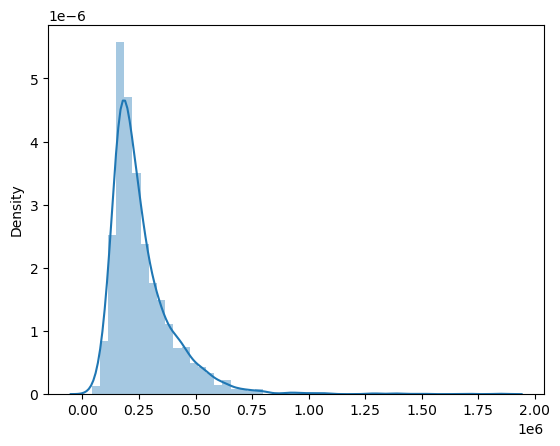

[Row(skewness(LISTPRICE)=2.790448093916559)]


In [29]:
# Select a single column and sample and convert to pandas
sample_df = df.select(['LISTPRICE']).sample(False, .5, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.distplot(pandas_df)
plt.show();

# Import skewness function
from pyspark.sql.functions import skewness

# Compute and print skewness of LISTPRICE
print(df.agg({'LISTPRICE': 'skewness'}).collect())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


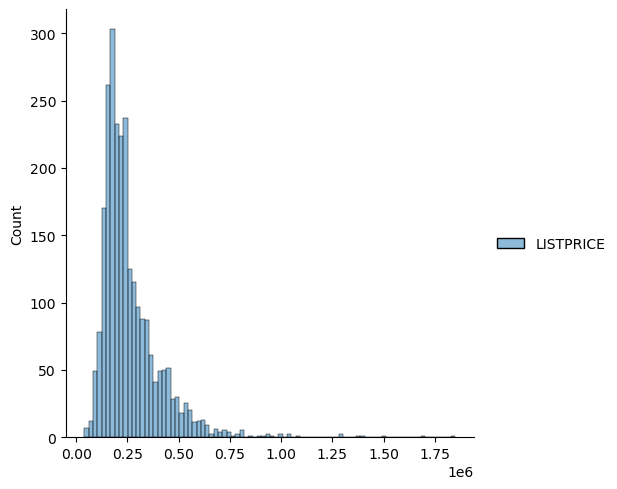

In [31]:
sns.displot(pandas_df)
plt.show();

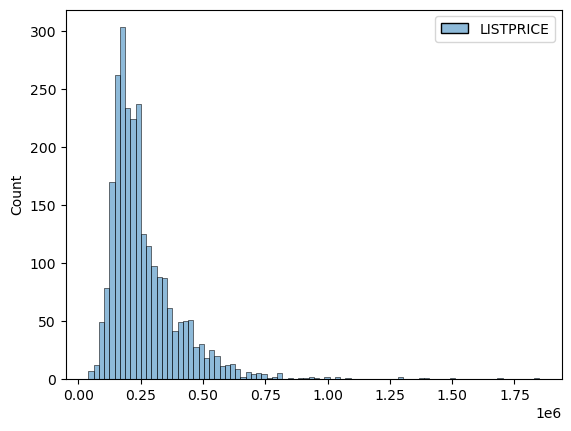

In [32]:
sns.histplot(pandas_df)
plt.show()

### Using Visualizations: lmplot
Creating linear model plots helps us visualize if variables have relationships with the dependent variable. If they do they are good candidates to include in our analysis. If they don't it doesn't mean that we should throw them out, it means we may have to process or wrangle them before they can be used.

`seaborn` is available in your workspace with the customary alias `sns`.

**Instructions**

- Using the loaded data set df filter it down to the columns `'SALESCLOSEPRICE'` and `'LIVINGAREA'` with `select()`.
- Sample 50% of the dataframe with `sample()` making sure to not use replacement and setting the random seed to 42.
- Convert the Spark DataFrame to a `pandas.DataFrame()` with `toPandas()`.
- Using `'SALESCLOSEPRICE'` as your dependent variable and `'LIVINGAREA'` as your independent, plot a linear model plot using seaborn `lmplot()`.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


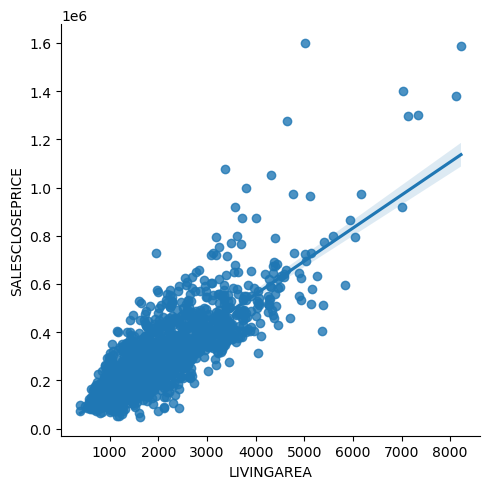

In [34]:
# Select a the relevant columns and sample
sample_df = df.select(['SALESCLOSEPRICE', 'LIVINGAREA']).sample(False, 0.5, 42)

# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

# Linear model plot of pandas_df
sns.lmplot(x='LIVINGAREA', y='SALESCLOSEPRICE', data=pandas_df)
plt.show();